# Problem 2: German Credit

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from matplotlib import pyplot as plt

In [2]:
creditFile = open('data/GermanCredit.csv')
credit = pd.read_csv(creditFile)
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


### Preprocessing

#### 1. Drop the 3 columns that contribute the least to the dataset.These would be the columns with the highest number of non-zero‘none’ values. Break ties by going left to right in columns. (Yourcode should be generalizable to drop ncolumns, but for the rest of theanalysis, you can call your code for n= 3.)

In [3]:
def dropNones(n):
    # Drops the n number of columns with the most 'none' values
    # Returns statement with number of columns that were dropped
    noneCounts = {}

    for col in credit:
        if 'none' in credit[col].value_counts():
            noneCounts[col] = credit[col].value_counts()['none']
    noneCounts = dict(sorted(noneCounts.items(), key = lambda x:x[1], reverse = True))

    i = 0
    for col, nones in noneCounts.items():
        if i == n: break
        del credit[col]
        i += 1
    return f'{i} columns dropped'


In [4]:
dropNones(3)

'3 columns dropped'

In [5]:
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


#### 2. Certain values in some of the columns contain unnecessaryapostrophes ('). Remove the apostrophes.

In [6]:
def dropApostr():
    def mapper(val):
        if type(val) == str:
            return val.strip('\'')
        else:
            return val
    
    for col in credit:
        credit[col] = credit[col].map(mapper)

In [7]:
dropApostr()

In [8]:
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


#### 3. The checking_status column has values in 4 categories:'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [9]:
def checkingConvert():
    def mapper(val):
        if val == 'no checking':
            return 'No Checking'
        elif val == '<0':
            return 'Low'
        elif val == '0<=X<200':
            return 'Medium'
        elif val == '>=200':
            return 'High'
    credit['checking_status'] = credit['checking_status'].map(mapper)

In [10]:
checkingConvert()

In [11]:
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


#### 4. The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Note that the last two are both 'High').

In [12]:
def savingsConvert():
    def mapper(val):
        if val == 'no known savings':
            return 'No Savings'
        elif val == '<100':
            return 'Low'
        elif val == '100<=X<500':
            return 'Medium'
        elif val == '500<=X<1000':
            return 'High'
        elif val == '>=1000':
            return 'High'
    credit['savings_status'] = credit['savings_status'].map(mapper)   

In [13]:
savingsConvert()

In [14]:
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


#### 5. Change class column values from 'good' to '1' and 'bad' to '0', and change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [15]:
### Class
# 'good' : 1
# 'bad' : 0
def classConvert():
    def mapper(val):
        if val == 'good':
            return 1
        elif val == 'bad':
            return 0
    credit['class'] = credit['class'].map(mapper)

In [16]:
### employment
# 'unemployed' : 'Unemployed'
# '<1' : 'Amateur'
# '1<=X<4' : 'Professional'
# '4<=X<7' : 'Experienced'
# '>=7' : 'Expert'

def employmentConvert():
    def mapper(val):
        if val == 'unemployed':
            return 'Unemployed'
        elif val == '<1':
            return 'Amateur'
        elif val == '1<=X<4':
            return 'Professional'
        elif val == '4<=X<7':
            return 'Experienced'
        elif val == '>=7':
            return 'Expert'
        else: print('Error')
    credit['employment'] = credit['employment'].map(mapper)

In [17]:
classConvert()
employmentConvert()

In [18]:
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


### Analysis

#### 1a. Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [19]:
pd.crosstab(credit['foreign_worker'],credit['class'])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


#### 1b. Similarly, get the count of each category of employment for each category of saving_status.

In [20]:
pd.crosstab(credit['employment'], credit['savings_status'])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


#### 2. Find the average credit_amount of single males that have 4 ≤x<7 years of employment. You can leave the raw result as is, no need for rounding.

In [21]:
# 4<=x<7 : Experienced
credit[(credit['employment']=='Experienced') &
       (credit['personal_status']=='male single')].credit_amount.mean()

4142.592592592592

#### 3. Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [22]:
credit.job.value_counts()

skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: job, dtype: int64

In [23]:
credit[credit['job']=='skilled'].duration.mean()

21.41111111111111

In [24]:
credit[credit['job']=='unskilled resident'].duration.mean()

16.535

In [25]:
credit[credit['job']=='high qualif/self emp/mgmt'].duration.mean()

25.16891891891892

In [26]:
credit[credit['job']=='unemp/unskilled non res'].duration.mean()

17.363636363636363

#### 4. For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:

In [27]:
checkStat = credit[credit['purpose']=='education'].checking_status.value_counts().idxmax()
savStat = credit[credit['purpose']=='education'].savings_status.value_counts().idxmax()

print(f'Most common checking status: {checkStat}')
print(f'Most common savings status: {savStat}')

Most common checking status: No Checking
Most common savings status: Low


### Visualization

#### 1. Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.

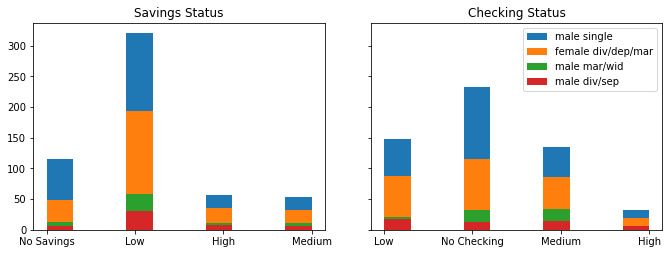

In [28]:
fig, axes = plt.subplots(1,2, figsize=(10,4),sharey=True)
fig.tight_layout(pad=3.0)

axes[0].set_title('Savings Status')
axes[0].hist(credit[credit['personal_status']=='male single'].savings_status, label = 'male single')
axes[0].hist(credit[credit['personal_status']=='female div/dep/mar'].savings_status, label = 'female div/dep/mar')
axes[0].hist(credit[credit['personal_status']=='male mar/wid'].savings_status, label = 'male mar/wid')
axes[0].hist(credit[credit['personal_status']=='male div/sep'].savings_status, label= 'male div/sep')


axes[1].set_title('Checking Status')
axes[1].hist(credit[credit['personal_status']=='male single'].checking_status, label = 'male single')
axes[1].hist(credit[credit['personal_status']=='female div/dep/mar'].checking_status, label = 'female div/dep/mar')
axes[1].hist(credit[credit['personal_status']=='male mar/wid'].checking_status, label = 'male mar/wid')
axes[1].hist(credit[credit['personal_status']=='male div/sep'].checking_status, label= 'male div/sep')

axes[1].legend()

plt.show()

#### 2. For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

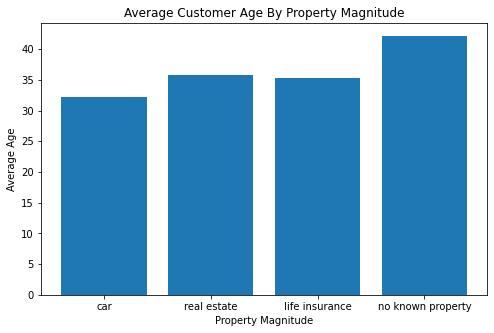

In [32]:
dct = {}
for val in credit['property_magnitude'].value_counts().index:
    dct[val] = credit[(credit['credit_amount']>4000) &
                      (credit['property_magnitude']==val)].age.mean()

plt.figure(figsize=(8,5))
plt.bar(dct.keys(),dct.values())
plt.ylabel('Average Age')
plt.xlabel('Property Magnitude')
plt.title('Average Customer Age By Property Magnitude')
plt.show()

#### 3. For people with a “High” savings_status and age above 40, use subplots to plot the following pie charts:

#### a) Personal status b) Credit history c) job

In [30]:
high40 = credit[(credit['savings_status']=='High') &
                (credit['age']>40)]

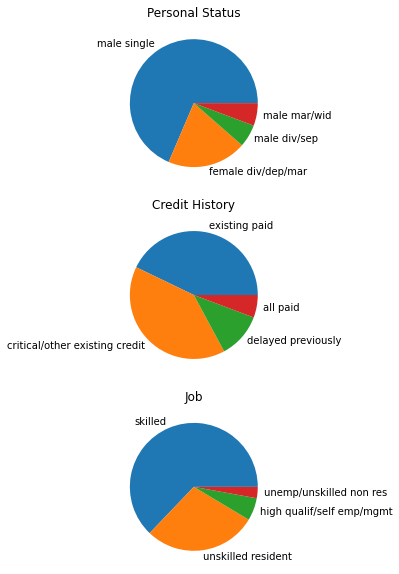

In [31]:
fig1, axes = plt.subplots(3,1,figsize=(4,10))

labels= high40['personal_status'].value_counts().index
axes[0].pie(high40['personal_status'].value_counts(),labels=labels)
axes[0].set_title('Personal Status')

labels = high40['credit_history'].value_counts().index
axes[1].pie(high40['credit_history'].value_counts(), labels=labels)
axes[1].set_title('Credit History')

labels = high40['job'].value_counts().index
axes[2].pie(high40['job'].value_counts(), labels=labels)
axes[2].set_title('Job')
plt.show()